# Pytorch Implementation-->1


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.utils.data import DataLoader

In [21]:
complete_training_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/train.csv')
complete_testing_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/test.csv')

In [22]:
number_of_samples=complete_training_data.shape[0]
number_of_pixels=complete_training_data.shape[1]-1
print('Number of Samples',number_of_samples)
print('Number of Pixels',number_of_pixels)
complete_training_data.head()

Number of Samples 42000
Number of Pixels 784


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
task1_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/Task1_data.csv')
print('Shape of the Task 1 dataset',task1_data.shape)
task1_data.head()

Shape of the Task 1 dataset (21416, 786)


,Unnamed: 0,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
task2_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/Task2_data.csv')
print('Shape of the Task 2 dataset',task2_data.shape)
task2_data.head()

Shape of the Task 2 dataset (12333, 786)


,Unnamed: 0,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,6,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
task3_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/Task3_data.csv')
print('Shape of the Task 3 dataset',task3_data.shape)
task3_data.head()

Shape of the Task 3 dataset (8251, 786)


,Unnamed: 0,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,10,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,67,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Task 1 data label distribution


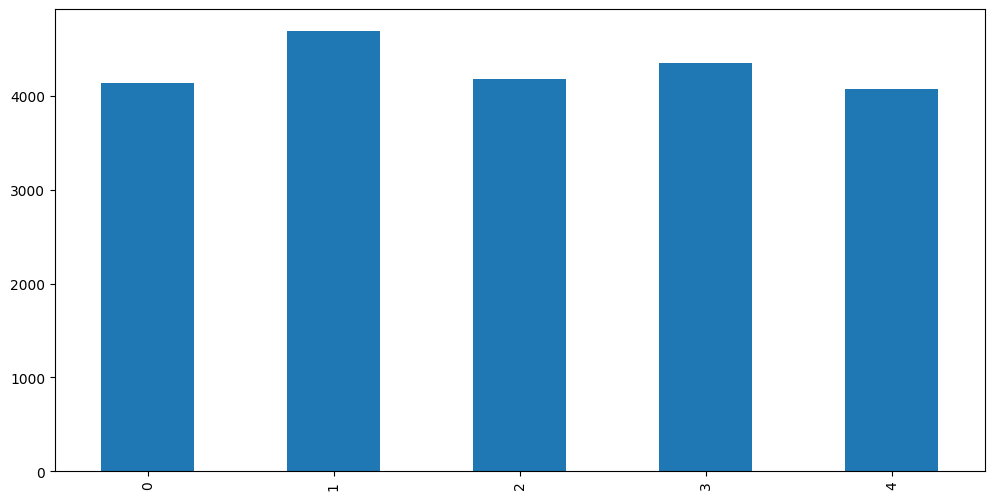

In [26]:
print('Task 1 data label distribution')
task1_data['label'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

Task 2 data label distribution


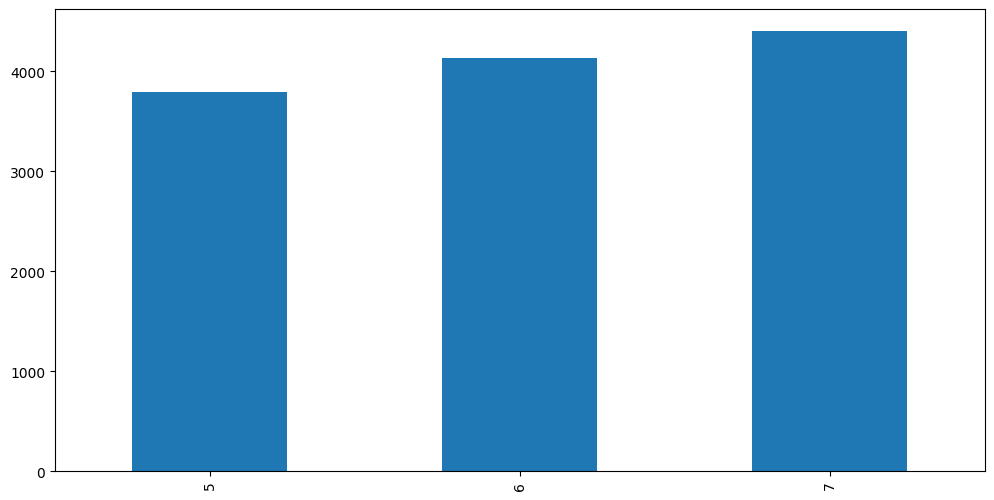

In [27]:
print('Task 2 data label distribution')
task2_data['label'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

Task 3 data label distribution


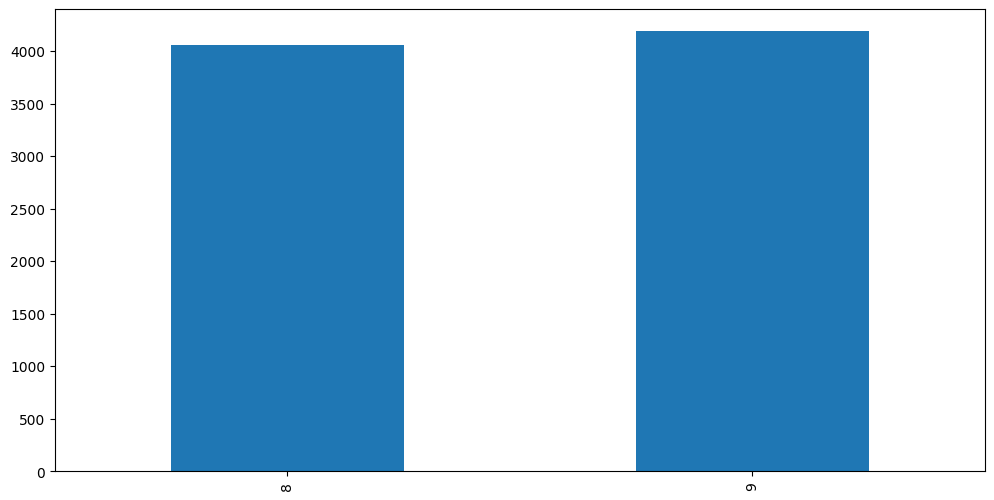

In [28]:
print('Task 3 data label distribution')
task3_data['label'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [29]:
#Dropping the label
task1_label=task1_data['label']
task1_data=task1_data.drop('label',axis=1)
task1_data=task1_data.drop('Unnamed: 0',axis=1)

In [30]:
#Splitting the training and test dataset shape
X_train_task1,X_test_task1,Y_train_task1,Y_test_task1 = train_test_split(task1_data,task1_label,random_state=421212, test_size=0.1,shuffle=True)
print(X_train_task1.shape)
print(Y_train_task1.shape)
print(X_test_task1.shape)
print(Y_test_task1.shape)

(19274, 784)
(19274,)
(2142, 784)
(2142,)


In [31]:
X_train_task1=np.asarray(X_train_task1)
Y_train_task1=np.asarray(Y_train_task1)
X_test_task1=np.asarray(X_test_task1)
Y_test_task1=np.asarray(Y_test_task1)
X_train_task1 = torch.tensor(X_train_task1, dtype=torch.float32)
Y_train_task1 = torch.tensor(Y_train_task1, dtype=torch.float32)
X_test_task1 = torch.tensor(X_test_task1, dtype=torch.float32)
Y_test_task1 = torch.tensor(Y_test_task1, dtype=torch.float32)

In [32]:
Train_loader_task1 = DataLoader(list(zip(X_train_task1, Y_train_task1)), shuffle=True)
Test_loader_task1 = DataLoader(list(zip(X_test_task1, Y_test_task1)), shuffle=False)

In [33]:
import torch
import torch.nn as nn
import numpy
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as  np
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

class classification_model(nn.Module):
  def __init__(self,number_of_classes):
    super(classification_model, self).__init__()
    self.linear1=nn.Linear(784,390)
    self.linear2=nn.Linear(390,190)
    self.linear3=nn.Linear(190,95)
    self.linear4=nn.Linear(95,45)
    self.linear5=nn.Linear(45,20)
    self.linear6=nn.Linear(20,number_of_classes)

  def forward(self,x):
    output=F.relu(self.linear1(x))
    output=F.relu(self.linear2(output))
    output=F.relu(self.linear3(output))
    output=F.relu(self.linear4(output))
    output=F.relu(self.linear5(output))
    output=F.relu(self.linear6(output))
    return output

# Function to calculate accuracy
def accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    return 100 * correct / total

# Function to calculate precision, recall, and f1-score
def precision_recall(model, criterion, optimizer, Test_loader_task1):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in Test_loader_task1:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted',labels=np.unique(y_pred))
    return precision, recall, f1

def task1_train(model, criterion, optimizer, Train_loader_task1):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in Train_loader_task1:
        optimizer.zero_grad()
        labels =  labels.type(torch.LongTensor)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(Train_loader_task1)
    epoch_accuracy = 100 * correct / total
    return epoch_loss, epoch_accuracy

# Function to validate the model
def task1_validate(model, criterion, Test_loader_task1):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in Test_loader_task1:
            labels =  labels.type(torch.LongTensor)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(Test_loader_task1)
    epoch_accuracy = 100 * correct / total
    return epoch_loss, epoch_accuracy

def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

In [ ]:
# Initialize the model, loss function, and optimizer
learning_rate=0.00001
number_of_epochs_task1=10
model = classification_model(10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
num_params = count_parameters(model)
print(f"Number of parameters in the model: {num_params}")

# Training loop
for epoch in range(number_of_epochs_task1):
    train_loss_task1, train_accuracy_task1 = task1_train(model, criterion, optimizer, Train_loader_task1)
    val_loss_task1, val_accuracy_task1 = task1_validate(model, criterion, Test_loader_task1)
    precision_task1, recall_task1, _ = precision_recall(model, criterion, optimizer, Test_loader_task1)

    print(f"Epoch [{epoch+1}/{number_of_epochs_task1}] - "
          f"Train Loss: {train_loss_task1:.4f}, Train Accuracy: {train_accuracy_task1:.2f}%, "
          f"Val Loss: {val_loss_task1:.4f}, Val Accuracy: {val_accuracy_task1:.2f}%, "
          f"Precision: {precision_task1:.4f}, Recall: {recall_task1:.4f}")

Number of parameters in the model: 404035
Epoch [1/10] - Train Loss: 0.2302, Train Accuracy: 93.92%, Val Loss: 0.0957, Val Accuracy: 97.20%, Precision: 0.9721, Recall: 0.9720
Epoch [2/10] - Train Loss: 0.0562, Train Accuracy: 98.30%, Val Loss: 0.0746, Val Accuracy: 97.95%, Precision: 0.9796, Recall: 0.9795
Epoch [3/10] - Train Loss: 0.0346, Train Accuracy: 99.01%, Val Loss: 0.0623, Val Accuracy: 98.32%, Precision: 0.9832, Recall: 0.9832
Epoch [4/10] - Train Loss: 0.0230, Train Accuracy: 99.35%, Val Loss: 0.0627, Val Accuracy: 98.55%, Precision: 0.9856, Recall: 0.9855
Epoch [5/10] - Train Loss: 0.0154, Train Accuracy: 99.55%, Val Loss: 0.0676, Val Accuracy: 98.46%, Precision: 0.9847, Recall: 0.9846
Epoch [6/10] - Train Loss: 0.0110, Train Accuracy: 99.68%, Val Loss: 0.0630, Val Accuracy: 98.41%, Precision: 0.9842, Recall: 0.9841
Epoch [7/10] - Train Loss: 0.0073, Train Accuracy: 99.77%, Val Loss: 0.0557, Val Accuracy: 98.69%, Precision: 0.9869, Recall: 0.9869
Epoch [8/10] - Train Loss: 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Calculate the importance of parameters for the old task
def calculate_importance(model, dataloader, criterion, old_task_weights):
  importance = {}                                #Initialising a dictionary
  for name, param in model.named_parameters():
    if param.requires_grad:
      # Use the correct names from your model
      if name in old_task_weights:
        importance[name] = torch.zeros_like(param)
        for inputs, labels in dataloader:
          labels =  labels.type(torch.LongTensor)
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          importance[name] += (param.grad.detach() ** 2)
          model.zero_grad()
        importance[name] /= len(dataloader)
        importance[name] *= (old_task_weights[name] ** 2)
  return importance


# Store the old task's weights
old_task_weights = {}
for name, param in model.named_parameters():
    if param.requires_grad:
        old_task_weights[name] = param.detach()

class EWC:
    def __init__(self, prior_model, data_samples, num_sample=30):
        self.prior_model = prior_model
        self.prior_weights = [param.data for param in prior_model.parameters()]
        self.num_sample = num_sample
        self.data_samples = data_samples
        self.fisher_matrix = self.compute_fisher()

    def compute_fisher(self):
        weights = self.prior_weights
        fisher_accum = [torch.zeros_like(w) for w in weights]
        for j in tqdm(range(self.num_sample)):
            idx = np.random.randint(self.data_samples.shape[0])
            data = torch.tensor(self.data_samples[idx]).view(1, -1)
            logits = self.prior_model(data)
            log_probs = torch.nn.functional.log_softmax(logits, dim=1)
            grads = torch.autograd.grad(log_probs, weights, create_graph=True)
            grads = [g**2 for g in grads]
            fisher_accum = [acc + grad for acc, grad in zip(fisher_accum, grads)]
        fisher_accum = [acc / self.num_sample for acc in fisher_accum]
        return fisher_accum

    def get_fisher(self):
        return self.fisher_matrix

In [ ]:
def task2_train(model, criterion, optimizer, Train_loader_task2):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in Train_loader_task2:
        optimizer.zero_grad()
        labels =  labels.type(torch.LongTensor)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # Calculate EWC regularization term
        importance = calculate_importance(model, Train_loader_task2, criterion, old_task_weights)
        ewc_loss = 0
        for name, param in model.named_parameters():
          if param.requires_grad:
            ewc_loss += (importance[name] * (param - old_task_weights[name]) ** 2).sum()
        # Total loss
        total_loss = loss + (lambda_ * ewc_loss)
        total_loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        epoch_loss = running_loss / len(Train_loader_task1)
        epoch_accuracy = 100 * correct / total
        return epoch_loss, epoch_accuracy

# Function to validate the model
def task2_validate(model, criterion, Test_loader_task2):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in Test_loader_task2:
            labels =  labels.type(torch.LongTensor)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(Test_loader_task1)
    epoch_accuracy = 100 * correct / total
    return epoch_loss, epoch_accuracy

In [ ]:
#Dropping the label
task2_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/Task2_data.csv')
task2_label=task2_data['label']
task2_data=task2_data.drop('label',axis=1)
task2_data=task2_data.drop('Unnamed: 0',axis=1)

#Splitting the training and test dataset shape
X_train_task2,X_test_task2,Y_train_task2,Y_test_task2 = train_test_split(task2_data,task2_label,random_state=421212, test_size=0.1,shuffle=True)
print(X_train_task2.shape)
print(Y_train_task2.shape)
print(X_test_task2.shape)
print(Y_test_task2.shape)

X_train_task2=np.asarray(X_train_task2)
Y_train_task2=np.asarray(Y_train_task2)
X_test_task2=np.asarray(X_test_task2)
Y_test_task2=np.asarray(Y_test_task2)
X_train_task2 = torch.tensor(X_train_task2, dtype=torch.float32)
Y_train_task2 = torch.tensor(Y_train_task2, dtype=torch.float32)
X_test_task2 = torch.tensor(X_test_task2, dtype=torch.float32)
Y_test_task2 = torch.tensor(Y_test_task2, dtype=torch.float32)

Train_loader_task2 = DataLoader(list(zip(X_train_task2, Y_train_task2)), shuffle=True)
Test_loader_task2 = DataLoader(list(zip(X_test_task2, Y_test_task2)), shuffle=False)

In [ ]:
 # Train the model on the new task
learning_rate=0.0001
number_of_epochs_task2=15
criterion_new = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
lambda_= 0.1 #Larger the value retaining old task knowledge

for epoch in range(number_of_epochs_task2):
  optimizer.zero_grad()
  train_loss_task2, train_accuracy_task2 = task2_train(model, criterion, optimizer, Train_loader_task2)
  val_loss_task2, val_accuracy_task2 = task2_validate(model, criterion, Test_loader_task2)
  precision_task2, recall_task2, _ = precision_recall(model, criterion, optimizer, Test_loader_task2)

  print(f"Epoch [{epoch+1}/{number_of_epochs_task2}] - "
        f"Train Loss Task 2 : {train_loss_task2:.4f}, Train Accuracy Task 2: {train_accuracy_task2:.2f}%, "
        f"Val Loss Task 2 : {val_loss_task2:.4f}, Val Accuracy Task 2 : {val_accuracy_task2:.2f}%, "
        f"Precision Task 2 : {precision_task2:.4f}, Recall Task 2 : {recall_task2:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [1/15] - Train Loss Task 2 : 0.0007, Train Accuracy Task 2: 0.00%, Val Loss Task 2 : 3.7100, Val Accuracy Task 2 : 0.08%, Precision Task 2 : 1.0000, Recall Task 2 : 0.0024


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [2/15] - Train Loss Task 2 : 0.0001, Train Accuracy Task 2: 0.00%, Val Loss Task 2 : 3.5880, Val Accuracy Task 2 : 0.08%, Precision Task 2 : 1.0000, Recall Task 2 : 0.0024


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [3/15] - Train Loss Task 2 : 0.0003, Train Accuracy Task 2: 0.00%, Val Loss Task 2 : 3.3386, Val Accuracy Task 2 : 0.08%, Precision Task 2 : 1.0000, Recall Task 2 : 0.0024


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [4/15] - Train Loss Task 2 : 0.0001, Train Accuracy Task 2: 0.00%, Val Loss Task 2 : 3.1212, Val Accuracy Task 2 : 0.08%, Precision Task 2 : 1.0000, Recall Task 2 : 0.0024


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [5/15] - Train Loss Task 2 : 0.0001, Train Accuracy Task 2: 0.00%, Val Loss Task 2 : 2.9570, Val Accuracy Task 2 : 0.32%, Precision Task 2 : 1.0000, Recall Task 2 : 0.0094


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [6/15] - Train Loss Task 2 : 0.0002, Train Accuracy Task 2: 0.00%, Val Loss Task 2 : 2.7623, Val Accuracy Task 2 : 0.57%, Precision Task 2 : 1.0000, Recall Task 2 : 0.0165


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [7/15] - Train Loss Task 2 : 0.0002, Train Accuracy Task 2: 0.00%, Val Loss Task 2 : 2.5677, Val Accuracy Task 2 : 0.81%, Precision Task 2 : 1.0000, Recall Task 2 : 0.0236


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [8/15] - Train Loss Task 2 : 0.0002, Train Accuracy Task 2: 0.00%, Val Loss Task 2 : 2.3880, Val Accuracy Task 2 : 0.89%, Precision Task 2 : 1.0000, Recall Task 2 : 0.0259


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch [9/15] - Train Loss Task 2 : 0.0008, Train Accuracy Task 2: 0.00%, Val Loss Task 2 : 2.1841, Val Accuracy Task 2 : 0.97%, Precision Task 2 : 1.0000, Recall Task 2 : 0.0283


In [ ]:
val_loss_task1, val_accuracy_task1 = task1_validate(model, criterion, Test_loader_task1)
precision_task1, recall_task1, _ = precision_recall(model, criterion, optimizer, Test_loader_task1)

print(f"Val Loss Task 1 : {val_loss_task1:.4f}, Val Accuracy Task 1 : {val_accuracy_task1:.2f}%, "f"Precision Task 1 : {precision_task1:.4f}, Recall Task 1 : {recall_task1:.4f}")

In [ ]:
val_loss_task2, val_accuracy_task2 = task2_validate(model, criterion, Test_loader_task2)
precision_task2, recall_task2, _ = precision_recall(model, criterion, optimizer, Test_loader_task2)

print(f"Val Loss Task 2 : {val_loss_task2:.4f}, Val Accuracy Task 2 : {val_accuracy_task2:.2f}%, "f"Precision Task 2 : {precision_task2:.4f}, Recall Task 2 : {recall_task2:.4f}")

# Tensorflow implementation permute MNIST


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import backend as K
import numpy as np
from tqdm import tqdm


def evaluate(model, test_x, test_y):
    acc = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')
    for imgs, labels in zip(test_x, test_y):
        preds = model.predict_on_batch(np.array([imgs]))
        acc.update_state(labels, preds)
    return round(100*acc.result().numpy(), 2)


def permute_task(train, test):
    train_shape, test_shape = train.shape, test.shape
    train_flat, test_flat = train.reshape((-1, 784)), test.reshape((-1, 784))
    idx = np.arange(train_flat.shape[1])
    np.random.shuffle(idx)
    train_permuted, test_permuted = train_flat[:, idx], test_flat[:, idx]
    return (train_permuted.reshape(train_shape), test_permuted.reshape(test_shape))


class Train:

    def __init__(self, optimizer, loss_fn, prior_weights=None, lambda_=0.1):
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.prior_weights = prior_weights
        self.lambda_ = lambda_

    def train(self, model, epochs, train_task, fisher_matrix=None, test_tasks=None):
        # empty list to collect per epoch test acc of each task
        if test_tasks:
            test_acc = [[] for _ in test_tasks]
        else:
            test_acc = None
        for epoch in tqdm(range(epochs)):
            for batch in train_task:
                X, y = batch
                with tf.GradientTape() as tape:
                    pred = model(X)
                    loss = self.loss_fn(y, pred)
                    # if to execute training with EWC
                    if fisher_matrix is not None:
                        loss += self.compute_penalty_loss(model, fisher_matrix)
                grads = tape.gradient(loss, model.trainable_variables)
                self.optimizer.apply_gradients(zip(grads, model.trainable_variables))
            # evaluate with the test set of task after each epoch
            if test_acc:
                for i in range(len(test_tasks)):
                    test_acc[i].append(evaluate(model, test_tasks[i][0], test_tasks[i][1]))
        return test_acc

    def compute_penalty_loss(self, model, fisher_matrix):
        penalty = 0.
        for u, v, w in zip(fisher_matrix, model.weights, self.prior_weights):
            penalty += tf.math.reduce_sum(u * tf.math.square(v - w))
        return 0.5 * self.lambda_ * penalty


class EWC:

    def __init__(self, prior_model, data_samples, num_sample=30):
        self.prior_model = prior_model
        self.prior_weights = prior_model.weights
        self.num_sample = num_sample
        self.data_samples = data_samples
        self.fisher_matrix = self.compute_fisher()

    def compute_fisher(self):
        weights = self.prior_weights
        fisher_accum = np.array([np.zeros(layer.numpy().shape) for layer in weights],
                           dtype=object
                          )
        for j in tqdm(range(self.num_sample)):
            idx = np.random.randint(self.data_samples.shape[0])
            with tf.GradientTape() as tape:
                logits = tf.nn.log_softmax(self.prior_model(np.array([self.data_samples[idx]])))
            grads = tape.gradient(logits, weights)
            for m in range(len(weights)):
                fisher_accum[m] += np.square(grads[m])
        fisher_accum /= self.num_sample
        return fisher_accum

    def get_fisher(self):
        return self.fisher_matrix


class MLP3:

    def __init__(self, input_shape=(28, 28), hidden_layers_neuron_list=[200, 200], num_classes=10):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.hidden_layers_neuron_list = hidden_layers_neuron_list
        self.model = self.create_mlp()

    def create_mlp(self):
        model = Sequential([
                Flatten(input_shape=self.input_shape),
                Dense(self.hidden_layers_neuron_list[0], input_shape=self.input_shape, activation='relu'),
                Dense(self.hidden_layers_neuron_list[1], activation='relu'),
                Dense(self.num_classes)
        ])
        return model

    def get_uncompiled_model(self):
        return self.model

    def get_compiled_model(self, optimizer, loss_fn, metrics ):
        compiled_model = self.model
        compiled_model.compile(optimizer, loss_fn, metrics)
        return compiled_model

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tqdm import tqdm

%env CUDA_VISIBLE_DEVICES=3

env: CUDA_VISIBLE_DEVICES=3


In [ ]:
epochs = 10
lambda_ = 0.1
lr = 0.001
num_sample = 30
opt = tf.keras.optimizers.Adam(learning_rate=lr)
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
(x_train_A, y_train_A), (x_test_A, y_test_A) = mnist.load_data()
x_train_A = x_train_A.astype('float32')
x_test_A = x_test_A.astype('float32')
x_train_A /= 255
x_test_A /= 255

train_A = tf.data.Dataset.from_tensor_slices((x_train_A, y_train_A)).shuffle(1000).batch(32)
test_A = (x_test_A, y_test_A)

x_train_B, x_test_B = permute_task(x_train_A, x_test_A)
y_train_B, y_test_B = y_train_A, y_test_A

train_B = tf.data.Dataset.from_tensor_slices((x_train_B, y_train_B)).shuffle(1000).batch(32)
test_B = (x_test_B, y_test_B)

11490434/11490434 [==============================] - 0s 0us/step


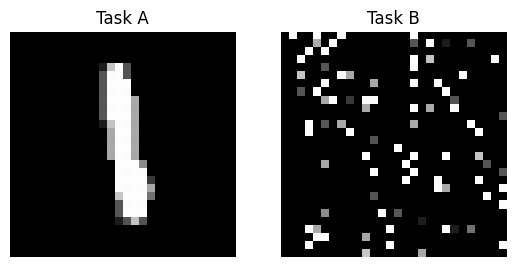

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_train_A[200], cmap='gray')
plt.title('Task A')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_train_B[200], cmap='gray')
plt.title('Task B')
plt.axis('off')
plt.show()

In [ ]:
mlp = MLP3()

In [ ]:
trn_gd = Train(opt, loss_fn)
model = mlp.get_compiled_model(opt, loss_fn, ['accuracy'])

acc_prior_A = trn_gd.train(model, epochs, train_A, test_tasks=[test_A])[0]
model.save('MNIST_A.h5')
print('[INFO] Task A Original (SGD): {}'.format(acc_prior_A[-1]))

100%|██████████| 10/10 [26:36<00:00, 159.63s/it]

[INFO] Task A Original (SGD): 97.8



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# construct the fisher matrix using samples from task A
ewc = EWC(model, x_train_A, num_sample=num_sample)
f_matrix = ewc.get_fisher()

100%|██████████| 30/30 [00:00<00:00, 97.15it/s]


In [ ]:
model_ewcB = mlp.get_compiled_model(opt, loss_fn, ['accuracy'])
model_ewcB.load_weights('MNIST_A.h5')
prior_weights = model_ewcB.get_weights()

In [ ]:
trn = Train(opt, loss_fn, prior_weights=prior_weights, lambda_=lambda_)
acc_ewcA, acc_ewcB = trn.train(model_ewcB,
                     epochs,
                     train_B,
                     fisher_matrix=f_matrix,
                     test_tasks=[test_A, test_B]
                    )

print('[INFO] Task A ACC. after training B with EWC: {}'.format(acc_ewcA[-1]))
print('[INFO] Task B ACC. after training B with EWC: {}'.format(acc_ewcB[-1]))

100%|██████████| 10/10 [41:23<00:00, 248.38s/it]

[INFO] Task A ACC. after training B with EWC: 97.07
[INFO] Task B ACC. after training B with EWC: 97.4


In [ ]:
model_sgdB = mlp.get_compiled_model(opt, loss_fn, ['accuracy'])
model_sgdB.load_weights('MNIST_A.h5')
acc_sgdA, acc_sgdB = trn_gd.train(model_sgdB, epochs, train_B, test_tasks = [test_A, test_B])

print('[INFO] Task A ACC. after training B with GD: {}'.format(acc_sgdA[-1]))
print('[INFO] Task B ACC. after training B with GD: {}'.format(acc_sgdB[-1]))

100%|██████████| 10/10 [39:18<00:00, 235.82s/it]

[INFO] Task A ACC. after training B with GD: 64.47
[INFO] Task B ACC. after training B with GD: 97.49


<ipython-input-13-12970a447285>:6: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "w". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  plt.bar(x, acc_ewcB[-1], width=width, label='EWC B', hatch='w/', ec='w')
<ipython-input-13-12970a447285>:7: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "w". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  plt.bar(x + width, acc_sgdB[-1], width=width, label='SGD B', hatch='w/', ec='w')
<ipython-input-13-12970a447285>:8: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "w". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  plt.bar(x + 3.5 * width, acc_prior_A[-1], width=width, label='Prior A', hatch='w/', ec='w')
<ipython-i

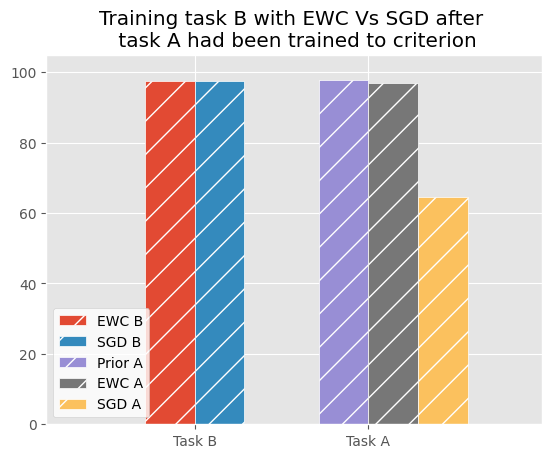

In [ ]:
x = 0
total_width, n = 0.1, 2
width = total_width / n
x = x - (total_width - width) / 2
plt.style.use('ggplot')
plt.bar(x, acc_ewcB[-1], width=width, label='EWC B', hatch='w/', ec='w')
plt.bar(x + width, acc_sgdB[-1], width=width, label='SGD B', hatch='w/', ec='w')
plt.bar(x + 3.5 * width, acc_prior_A[-1], width=width, label='Prior A', hatch='w/', ec='w')
plt.bar(x + 4.5 * width, acc_ewcA[-1], width=width, label='EWC A', hatch='w/', ec='w')
plt.bar(x + 5.5 * width, acc_sgdA[-1], width=width, label='SGD A', hatch='w/', ec='w')
plt.legend(facecolor='white', loc='lower left')
plt.xticks(np.array([0., 3.5 * width]), ('Task B', 'Task A'))
plt.title('Training task B with EWC Vs SGD after \n task A had been trained to criterion')
plt.xlim(-0.15, 0.35)
plt.ylim(0., 105.)
plt.show()

Text(0.5, 0, 'Epochs')

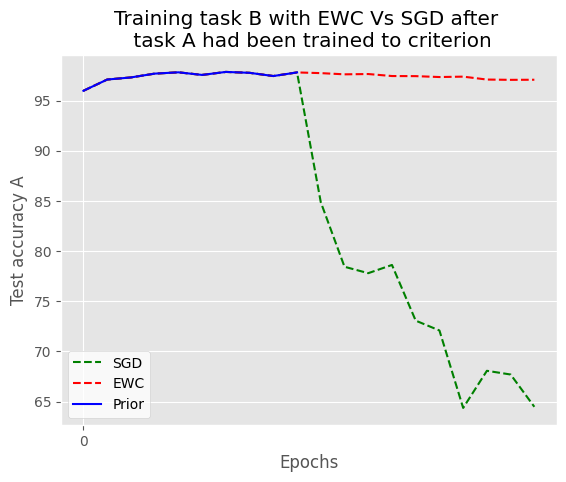

In [ ]:
plt.plot(range(0, epochs*2, 1), (acc_prior_A + acc_sgdA), color='green', linestyle='dashed', label = "SGD")
plt.plot(range(0, epochs*2, 1), (acc_prior_A + acc_ewcA), color='red', linestyle='dashed', label = "EWC")
plt.plot(range(0, epochs, 1), (acc_prior_A), color='blue', label = "Prior")
#plt.axvline(x=9, linestyle='dashed', color='green')
plt.xticks(range(0, epochs*2, 50))
plt.title('Training task B with EWC Vs SGD after \n task A had been trained to criterion')
plt.legend(facecolor='white')
plt.ylabel('Test accuracy A')
plt.xlabel('Epochs')

# PyTorch implemetation-2


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/ContinualAI/colab.git continualai/colab

Cloning into 'continualai/colab'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 378 (delta 78), reused 64 (delta 62), pack-reused 258
Receiving objects: 100% (378/378), 26.97 MiB | 10.71 MiB/s, done.
Resolving deltas: 100% (198/198), done.


In [ ]:
from continualai.colab.scripts import mnist
mnist.init()

Download complete.
Save complete.


100%|██████████| 9912422/9912422 [00:00<00:00, 17237278.01it/s]


Extracting data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to data/mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 520284.22it/s]


Extracting data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to data/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:02<00:00, 661535.20it/s] 


Extracting data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to data/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1836372.54it/s]

Extracting data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/mnist/MNIST/raw



In [ ]:
x_train, t_train, x_test, t_test = mnist.load()

print("x_train dim and type: ", x_train.shape, x_train.dtype)
print("t_train dim and type: ", t_train.shape, t_train.dtype)
print("x_test dim and type: ", x_test.shape, x_test.dtype)
print("t_test dim and type: ", t_test.shape, t_test.dtype)

x_train dim and type:  (60000, 1, 28, 28) float32
t_train dim and type:  (60000,) uint8
x_test dim and type:  (10000, 1, 28, 28) float32
t_test dim and type:  (10000,) uint8


In [ ]:
# switch to False to use CPU
use_cuda = True

use_cuda = use_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu");
torch.manual_seed(1);

In [ ]:
import torch.nn.functional as F

class ImprovedNet(nn.Module):
    def __init__(self):
        super(ImprovedNet, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Dropout layers for regularization
        self.dropout_conv = nn.Dropout2d(p=0.2)
        self.dropout_fc = nn.Dropout(p=0.5)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = self.dropout_conv(x)

        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = self.dropout_conv(x)

        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = self.dropout_conv(x)
        print(x.shape)

        expected_size = 294912
        x = x.view(-1, expected_size)

        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)

        x = F.relu(self.fc2(x))
        x = self.dropout_fc(x)

        x = self.fc3(x)
        return x

In [ ]:
def permute_mnist(mnist, seed):
    """ Given the training set, permute pixels of each img the same way. """

    np.random.seed(seed)
    print("starting permutation...")
    h = w = 28
    perm_inds = list(range(h*w))
    np.random.shuffle(perm_inds)
    # print(perm_inds)
    perm_mnist = []
    for set in mnist:
        num_img = set.shape[0]
        flat_set = set.reshape(num_img, w * h)
        perm_mnist.append(flat_set[:, perm_inds].reshape(num_img, 1, w, h))
    print("done.")
    return perm_mnist

In [ ]:
# task 1
task_1 = [(x_train, t_train), (x_test, t_test)]

# task 2
x_train2, x_test2 = permute_mnist([x_train, x_test], 1)
task_2 = [(x_train2, t_train), (x_test2, t_test)]

# task 3
x_train3, x_test3 = permute_mnist([x_train, x_test], 2)
task_3 = [(x_train3, t_train), (x_test3, t_test)]

# task list
tasks = [task_1, task_2, task_3]

starting permutation...
done.
starting permutation...
done.


In [ ]:
model = ImprovedNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
fisher_dict = {}
optpar_dict = {}
ewc_lambda = 0.4

In [ ]:
def on_task_update(task_id, x_mem, t_mem):

  model.train()
  optimizer.zero_grad()

  # accumulating gradients
  for start in range(0, len(t_mem)-1, 256):
      end = start + 256
      x, y = torch.from_numpy(x_mem[start:end]), torch.from_numpy(t_mem[start:end]).long()
      x, y = x.to(device), y.to(device)
      output = model(x)
      loss = F.cross_entropy(output, y)
      loss.backward()

  fisher_dict[task_id] = {}
  optpar_dict[task_id] = {}

  # gradients accumulated can be used to calculate fisher
  for name, param in model.named_parameters():

    optpar_dict[task_id][name] = param.data.clone()
    fisher_dict[task_id][name] = param.grad.data.clone().pow(2)

In [ ]:
def train_ewc(model, device, task_id, x_train, t_train, optimizer, epoch):
    model.train()

    for start in range(0, len(t_train)-1, 256):
      end = start + 256
      x, y = torch.from_numpy(x_train[start:end]), torch.from_numpy(t_train[start:end]).long()
      x, y = x.to(device), y.to(device)

      optimizer.zero_grad()

      output = model(x)
      loss = F.cross_entropy(output, y)

      ### magic here! :-)
      for task in range(task_id):
        for name, param in model.named_parameters():
          fisher = fisher_dict[task][name]
          optpar = optpar_dict[task][name]
          loss += (fisher * (optpar - param).pow(2)).sum() * ewc_lambda

      loss.backward()
      optimizer.step()
      #print(loss.item())
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))

In [ ]:
def train(model, device, x_train, t_train, optimizer, epoch):
    model.train()

    for start in range(0, len(t_train)-1, 256):
      end = start + 256
      x, y = torch.from_numpy(x_train[start:end]), torch.from_numpy(t_train[start:end]).long()
      x, y = x.to(device), y.to(device)

      optimizer.zero_grad()

      output = model(x)
      loss = F.cross_entropy(output, y)
      loss.backward()
      optimizer.step()
      #print(loss.item())
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))

def test(model, device, x_test, t_test):
    model.eval()
    test_loss = 0
    correct = 0
    for start in range(0, len(t_test)-1, 256):
      end = start + 256
      with torch.no_grad():
        x, y = torch.from_numpy(x_test[start:end]), torch.from_numpy(t_test[start:end]).long()
        x, y = x.to(device), y.to(device)
        output = model(x)
        test_loss += F.cross_entropy(output, y).item() # sum up batch loss
        pred = output.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(y.view_as(pred)).sum().item()

    test_loss /= len(t_test)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(t_test),
        100. * correct / len(t_test)))
    return 100. * correct / len(t_test)

In [ ]:
ewc_accs = []
for id, task in enumerate(tasks):
  avg_acc = 0
  print("Training on task: ", id)

  (x_train, t_train), _ = task

  for epoch in range(1, 11):
    train_ewc(model, device, id, x_train, t_train, optimizer, epoch)
  on_task_update(id, x_train, t_train)

  for id_test, task in enumerate(tasks):
    print("Testing on task: ", id_test)
    _, (x_test, t_test) = task
    acc = test(model, device, x_test, t_test)
    avg_acc = avg_acc + acc

  print("Avg acc: ", avg_acc / 3)
  ewc_accs.append(avg_acc / 3)

Training on task:  0


RuntimeError: ignored

# PyTorch Implementation OWN dataset

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
complete_training_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/train.csv')
complete_testing_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/test.csv')

In [3]:
number_of_samples=complete_training_data.shape[0]
number_of_pixels=complete_training_data.shape[1]-1
print('Number of Samples',number_of_samples)
print('Number of Pixels',number_of_pixels)

Number of Samples 42000
Number of Pixels 784


In [4]:
task1_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/Task1_data.csv')
print('Shape of the Task 1 dataset',task1_data.shape)

Shape of the Task 1 dataset (21416, 786)


In [5]:
task2_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/Task2_data.csv')
print('Shape of the Task 2 dataset',task2_data.shape)

Shape of the Task 2 dataset (12333, 786)


In [6]:
task3_data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Continual_Learning/digit-recognizer/Task3_data.csv')
print('Shape of the Task 3 dataset',task3_data.shape)

Shape of the Task 3 dataset (8251, 786)


In [7]:
#Splitting the training and test dataset shape
#Dropping the label
task1_label=task1_data['label']
print(task1_label.unique())
task1_data=task1_data.drop('label',axis=1)
task1_data=task1_data.drop('Unnamed: 0',axis=1)
X_train_task1,X_test_task1,Y_train_task1,Y_test_task1 = train_test_split(task1_data,task1_label,random_state=421212, test_size=0.1,shuffle=True)
print(X_train_task1.shape)
print(X_test_task1.shape)
X_train_task1=np.asarray(X_train_task1)
Y_train_task1=np.asarray(Y_train_task1)
X_test_task1=np.asarray(X_test_task1)
Y_test_task1=np.asarray(Y_test_task1)
X_train_task1 = np.asarray(torch.tensor(X_train_task1, dtype=torch.float32))
Y_train_task1 = np.asarray(torch.tensor(Y_train_task1, dtype=torch.float32))
X_test_task1 = np.asarray(torch.tensor(X_test_task1, dtype=torch.float32))
Y_test_task1 = np.asarray(torch.tensor(Y_test_task1, dtype=torch.float32))

[0 1 2 3 4]
(19274, 784)
(2142, 784)


In [8]:
#Splitting the training and test dataset shape
#Dropping the label
task2_label=task2_data['label']
print(task2_label.unique())
task2_data=task2_data.drop('label',axis=1)
task2_data=task2_data.drop('Unnamed: 0',axis=1)
X_train_task2,X_test_task2,Y_train_task2,Y_test_task2 = train_test_split(task2_data,task2_label,random_state=421212, test_size=0.1,shuffle=True)
print(X_train_task2.shape)
print(X_test_task2.shape)

X_train_task2=np.asarray(X_train_task2)
Y_train_task2=np.asarray(Y_train_task2)
X_test_task2=np.asarray(X_test_task2)
Y_test_task2=np.asarray(Y_test_task2)
X_train_task2 = np.asarray(torch.tensor(X_train_task2, dtype=torch.float32))
Y_train_task2 = np.asarray(torch.tensor(Y_train_task2, dtype=torch.float32))
X_test_task2 = np.asarray(torch.tensor(X_test_task2, dtype=torch.float32))
Y_test_task2 = np.asarray(torch.tensor(Y_test_task2, dtype=torch.float32))

[7 6 5]
(11099, 784)
(1234, 784)


In [9]:
#Splitting the training and test dataset shape
#Dropping the label
task3_label=task3_data['label']
print(task3_label.unique())
task3_data=task3_data.drop('label',axis=1)
task3_data=task3_data.drop('Unnamed: 0',axis=1)
X_train_task3,X_test_task3,Y_train_task3,Y_test_task3 = train_test_split(task3_data,task3_label,random_state=421212, test_size=0.1,shuffle=True)
print(X_train_task3.shape)
print(X_test_task3.shape)

X_train_task3=np.asarray(X_train_task3)
Y_train_task3=np.asarray(Y_train_task3)
X_test_task3=np.asarray(X_test_task3)
Y_test_task3=np.asarray(Y_test_task3)
X_train_task3 = np.asarray(torch.tensor(X_train_task3, dtype=torch.float32))
Y_train_task3 = np.asarray(torch.tensor(Y_train_task3, dtype=torch.float32))
X_test_task3 = np.asarray(torch.tensor(X_test_task3, dtype=torch.float32))
Y_test_task3 = np.asarray(torch.tensor(Y_test_task3, dtype=torch.float32))

[8 9]
(7425, 784)
(826, 784)


In [10]:
# task 1
task_1 = [(X_train_task1, Y_train_task1), (X_test_task1, Y_test_task1)]

# task 2
task_2 = [(X_train_task2, Y_train_task2), (X_test_task2, Y_test_task2)]

# task 3
task_3 = [(X_train_task3, Y_train_task3), (X_test_task3, Y_test_task3)]

# task list
tasks = [task_1, task_2, task_3]

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class ClassificationModel(nn.Module):
    def __init__(self, number_of_classes):
        super(ClassificationModel, self).__init__()
        self.linear1 = nn.Linear(784, 390)
        self.dropout1 = nn.Dropout(0.5)  # Adding Dropout

        self.linear2 = nn.Linear(390, 190)
        self.dropout2 = nn.Dropout(0.5)

        self.linear3 = nn.Linear(190, 95)
        self.dropout3 = nn.Dropout(0.5)

        self.linear4 = nn.Linear(95, 45)
        self.dropout4 = nn.Dropout(0.5)

        self.linear5 = nn.Linear(45, 20)

        self.linear6 = nn.Linear(20, number_of_classes)

    def forward(self, x):
        x = F.relu(self.linear1(x))  # Applying Batch Normalization before activation
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = F.relu(self.linear5(x))

        # Applying dropout after activation
        x = F.dropout(x, training=self.training)
        x = self.linear6(x)
        return x

In [12]:
# switch to False to use CPU
use_cuda = True

use_cuda = use_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu");
torch.manual_seed(1);

In [14]:
model = ClassificationModel(10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
fisher_dict = {}
optpar_dict = {}
ewc_lambda = 0.4

In [15]:
def on_task_update(task_id, x_mem, t_mem):

  model.train()
  optimizer.zero_grad()

  # accumulating gradients
  for start in range(0, len(t_mem)-1, 256):
      end = start + 256
      x, y = torch.from_numpy(x_mem[start:end]), torch.from_numpy(t_mem[start:end]).long()
      x, y = x.to(device), y.to(device)
      output = model(x)
      loss = F.cross_entropy(output, y)
      loss.backward()

  fisher_dict[task_id] = {}
  optpar_dict[task_id] = {}

  # gradients accumulated can be used to calculate fisher
  for name, param in model.named_parameters():

    optpar_dict[task_id][name] = param.data.clone()
    fisher_dict[task_id][name] = param.grad.data.clone().pow(2)

In [16]:
def train_ewc(model, device, task_id, x_train, t_train, optimizer, epoch):
    model.train()

    for start in range(0, len(t_train)-1, 256):
      end = start + 256
      x, y = torch.from_numpy(x_train[start:end]), torch.from_numpy(t_train[start:end]).long()
      x, y = x.to(device), y.to(device)

      optimizer.zero_grad()

      output = model(x)
      loss = F.cross_entropy(output, y)

      ### magic here! :-)
      for task in range(task_id):
        for name, param in model.named_parameters():
          fisher = fisher_dict[task][name]
          optpar = optpar_dict[task][name]
          loss += (fisher * (optpar - param).pow(2)).sum() * ewc_lambda

      loss.backward()
      optimizer.step()
      #print(loss.item())
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))

In [17]:
def train(model, device, x_train, t_train, optimizer, epoch):
    model.train()

    for start in range(0, len(t_train)-1, 256):
      end = start + 256
      x, y = torch.from_numpy(x_train[start:end]), torch.from_numpy(t_train[start:end]).long()
      x, y = x.to(device), y.to(device)

      optimizer.zero_grad()

      output = model(x)
      loss = F.cross_entropy(output, y)
      loss.backward()
      optimizer.step()
      #print(loss.item())
    print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.item()))

def test(model, device, x_test, t_test):
    model.eval()
    test_loss = 0
    correct = 0
    for start in range(0, len(t_test)-1, 256):
      end = start + 256
      with torch.no_grad():
        x, y = torch.from_numpy(x_test[start:end]), torch.from_numpy(t_test[start:end]).long()
        x, y = x.to(device), y.to(device)
        output = model(x)
        test_loss += F.cross_entropy(output, y).item() # sum up batch loss
        pred = output.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(y.view_as(pred)).sum().item()

    test_loss /= len(t_test)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(t_test),
        100. * correct / len(t_test)))
    return 100. * correct / len(t_test)

In [19]:
 ewc_accs = []
for id, task in enumerate(tasks):
  avg_acc = 0
  print("Training on task: ", id)

  (x_train, t_train), _ = task

  for epoch in range(1, 11):
    train_ewc(model, device, id, x_train, t_train, optimizer, epoch)
  on_task_update(id, x_train, t_train)

  for id_test, task in enumerate(tasks):
    print("Testing on task: ", id_test)
    _, (x_test, t_test) = task
    acc = test(model, device, x_test, t_test)
    avg_acc = avg_acc + acc

  print("Avg acc: ", avg_acc / 11)
  ewc_accs.append(avg_acc / 11)

Training on task:  0
Train Epoch: 1 	Loss: 0.368866
Train Epoch: 2 	Loss: 0.165007
Train Epoch: 3 	Loss: 0.092843
Train Epoch: 4 	Loss: 0.168114
Train Epoch: 5 	Loss: 0.049216
Train Epoch: 6 	Loss: 0.084705
Train Epoch: 7 	Loss: 0.177070
Train Epoch: 8 	Loss: 0.045055
Train Epoch: 9 	Loss: 0.043487
Train Epoch: 10 	Loss: 0.087440
Testing on task:  0
Test set: Average loss: 0.0002, Accuracy: 2119/2142 (99%)

Testing on task:  1
Test set: Average loss: 0.0281, Accuracy: 0/1234 (0%)

Testing on task:  2
Test set: Average loss: 0.0322, Accuracy: 0/826 (0%)

Avg acc:  8.993294287411935
Training on task:  1
Train Epoch: 1 	Loss: 0.706367
Train Epoch: 2 	Loss: 0.263349
Train Epoch: 3 	Loss: 0.160854
Train Epoch: 4 	Loss: 0.144943
Train Epoch: 5 	Loss: 0.145219
Train Epoch: 6 	Loss: 0.152127
Train Epoch: 7 	Loss: 0.170470
Train Epoch: 8 	Loss: 0.119032
Train Epoch: 9 	Loss: 0.110552
Train Epoch: 10 	Loss: 0.105627
Testing on task:  0
Test set: Average loss: 0.0363, Accuracy: 0/2142 (0%)

Testi